In [2]:
import pandas as pd
from ivpy import attach,show,montage,histogram,scatter,compose

In [6]:
df.filename = [DIR+item for item in df.filename]

Source ID  Creator  First Year        Type  Width (mm)  Height (mm)  \
0  001AAN005121  Anônimo      1905.0  Photograph       141.0         83.0   
1  001AAN005122  Anônimo      1908.0  Photograph       141.0         83.0   
2  001AAN005123  Anônimo      1905.0  Photograph       141.0         83.0   
3  001AAN005124  Anônimo      1905.0  Photograph       141.0         83.0   
4  001AAN005125  Anônimo      1905.0  Photograph       141.0         83.0   

   Latitude  Longitude   entropy  brightness    contrast  homogeneity  \
0 -22.94609  -43.14192  1.934681    0.743779  186.641212     0.546117   
1 -22.89496  -43.16647  1.431901    0.803458  148.828718     0.675585   
2 -22.89405  -43.16600  1.874825    0.758235  187.886227     0.594973   
3 -22.90131  -43.17648  2.074725    0.599253  233.402971     0.397265   
4 -22.90944  -43.18734  2.215759    0.656902  294.381378     0.349474   

   creators_number                                               path  
0                0  /mnt/e/ivpy/Images/Situated-Views-Lowres/001AA...  
1                0  /mnt/e/ivpy/Images/Situated-Views-Lowres/001AA...  
2                0  /mnt/e/ivpy/Images/Situated-Views-Lowres/001AA...  
3                0  /mnt/e/ivpy/Images/Situated-Views-Lowres/001AA...  
4                0  /mnt/e/ivpy/Images/Situated-Views-Lowres/001AA...

In [7]:
attach(df,'filename')

# scatter( )

While histograms have a single data axis, scatterplots have two. Both 'xcol' and 'ycol' now specify proper axes, and there is no binning (at least, not natively) and no 'ascending' arguments. Unlike montages and histograms, image scatterplots confront a real problem of occlusion:

In [9]:
scatter('hue','brightness')

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

The general trend here is still readable, but many individual images are now fully or partially hidden by others. The function arguments provide several ways of dealing with this. The first, which we've seen already, is to change the thumbnail size:

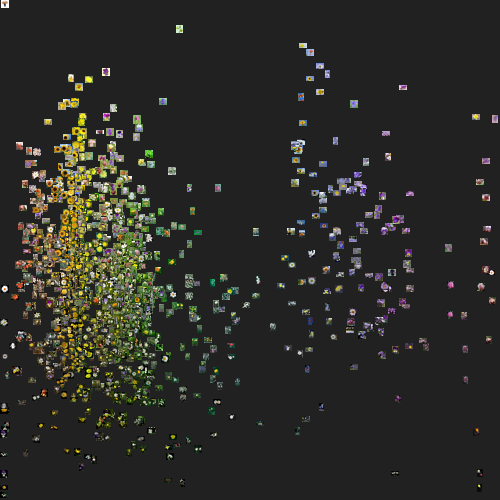

In [6]:
scatter('hue','brightness',thumb=8)

### side

This certainly helps, although now the images are so small, they're difficult to read. Instead of changing the thumbnail size, we can also increase the plot canvas using 'side'. Note that 'side' adjusts both x and y together, and ivpy enforces a square for all scatterplots. 

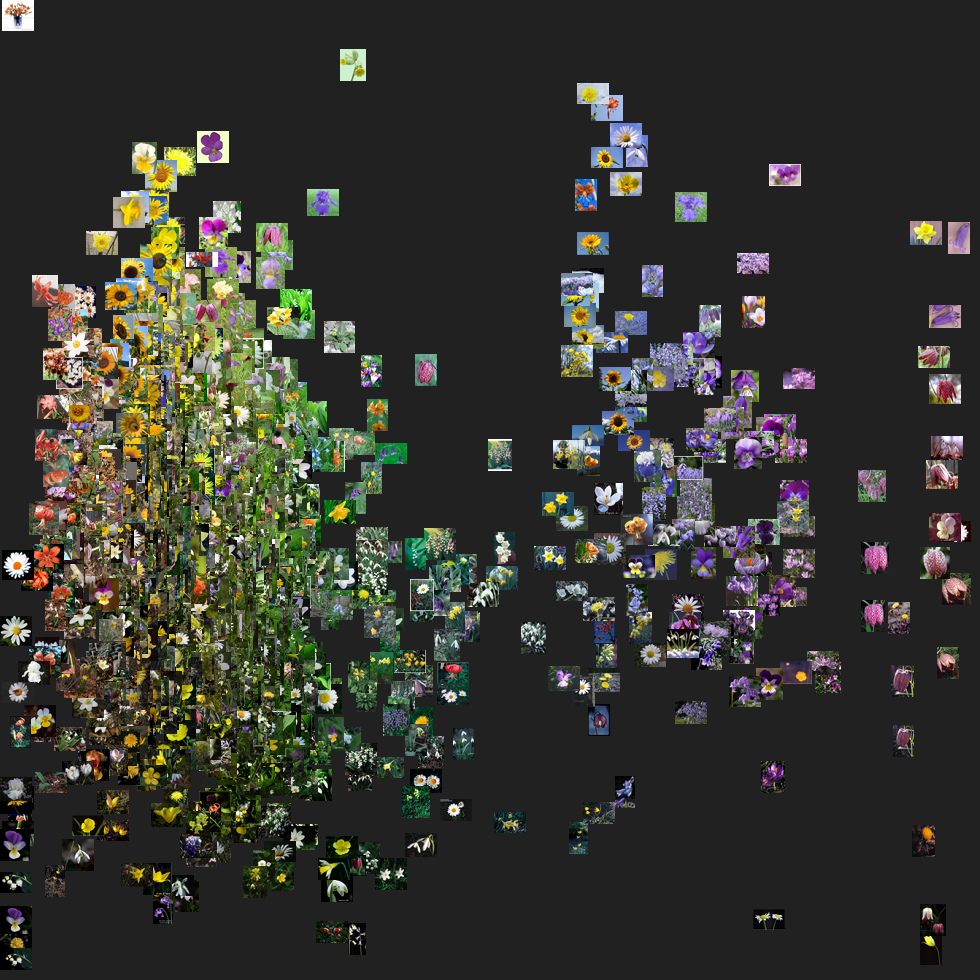

In [7]:
scatter('hue','brightness',side=980)

### xbins and ybins

Above we said that scatterplots have no "native" binning, but ivpy can bin either or both axes using 'xbins' and 'ybins'. Arguably, what results is no longer a strict scatterplot, but it will be useful in some cases. Note that this doesn't really solve the problem of occlusion, but rather makes it a bit tidier.  

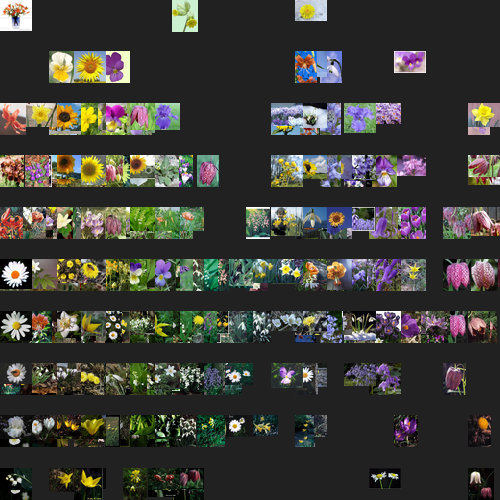

In [8]:
scatter('hue','brightness',xbins=20,ybins=10)

Note that if we set 'xbins' and 'ybins' to the same number, we get something like a grid, and if we set 'thumb' and 'side' so that bins * thumb = side, we get a perfect grid:

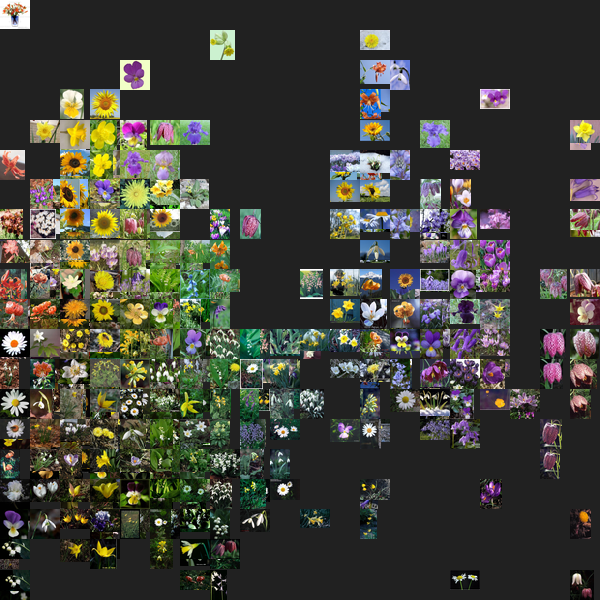

In [9]:
scatter('hue','brightness',xbins=20,ybins=20,thumb=30,side=600)

### facetcol

As before, domains will stay fixed across facets:

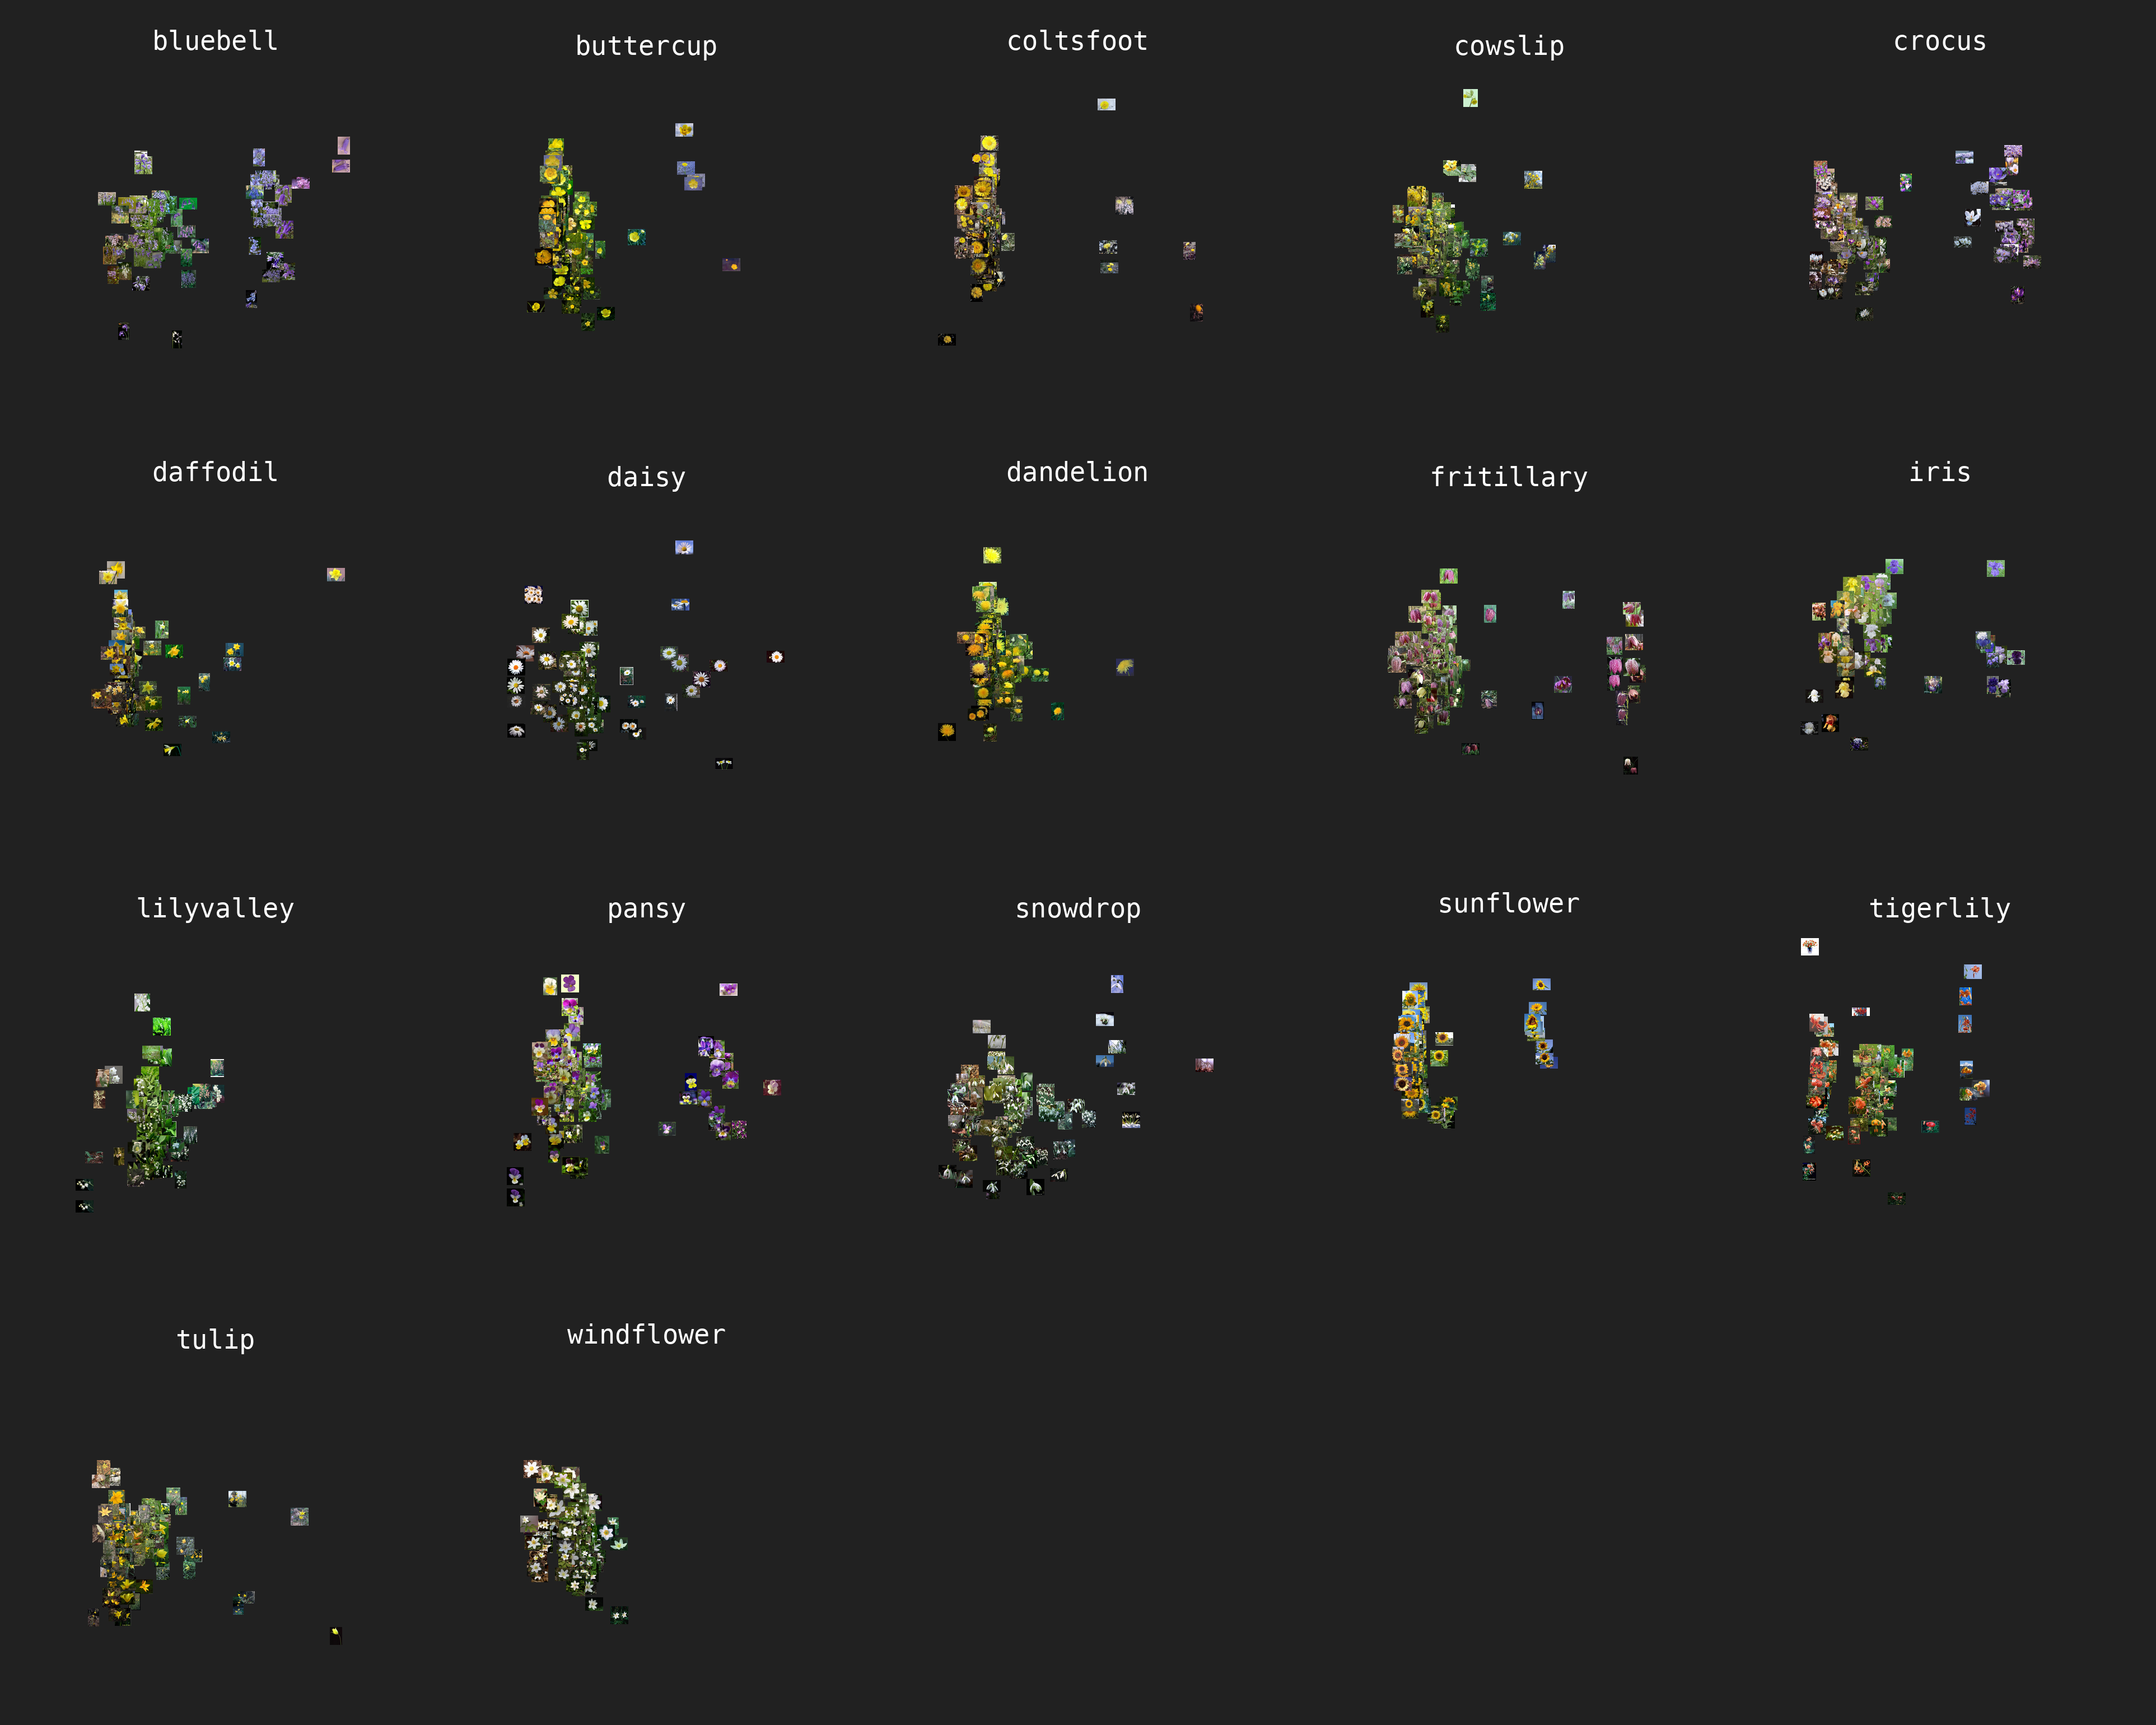

In [10]:
scatter('hue','brightness',facetcol='flowername')

### coordinates

Like the histogram, the scatterplot defaults to Cartesian coordinates but has a polar form as well:

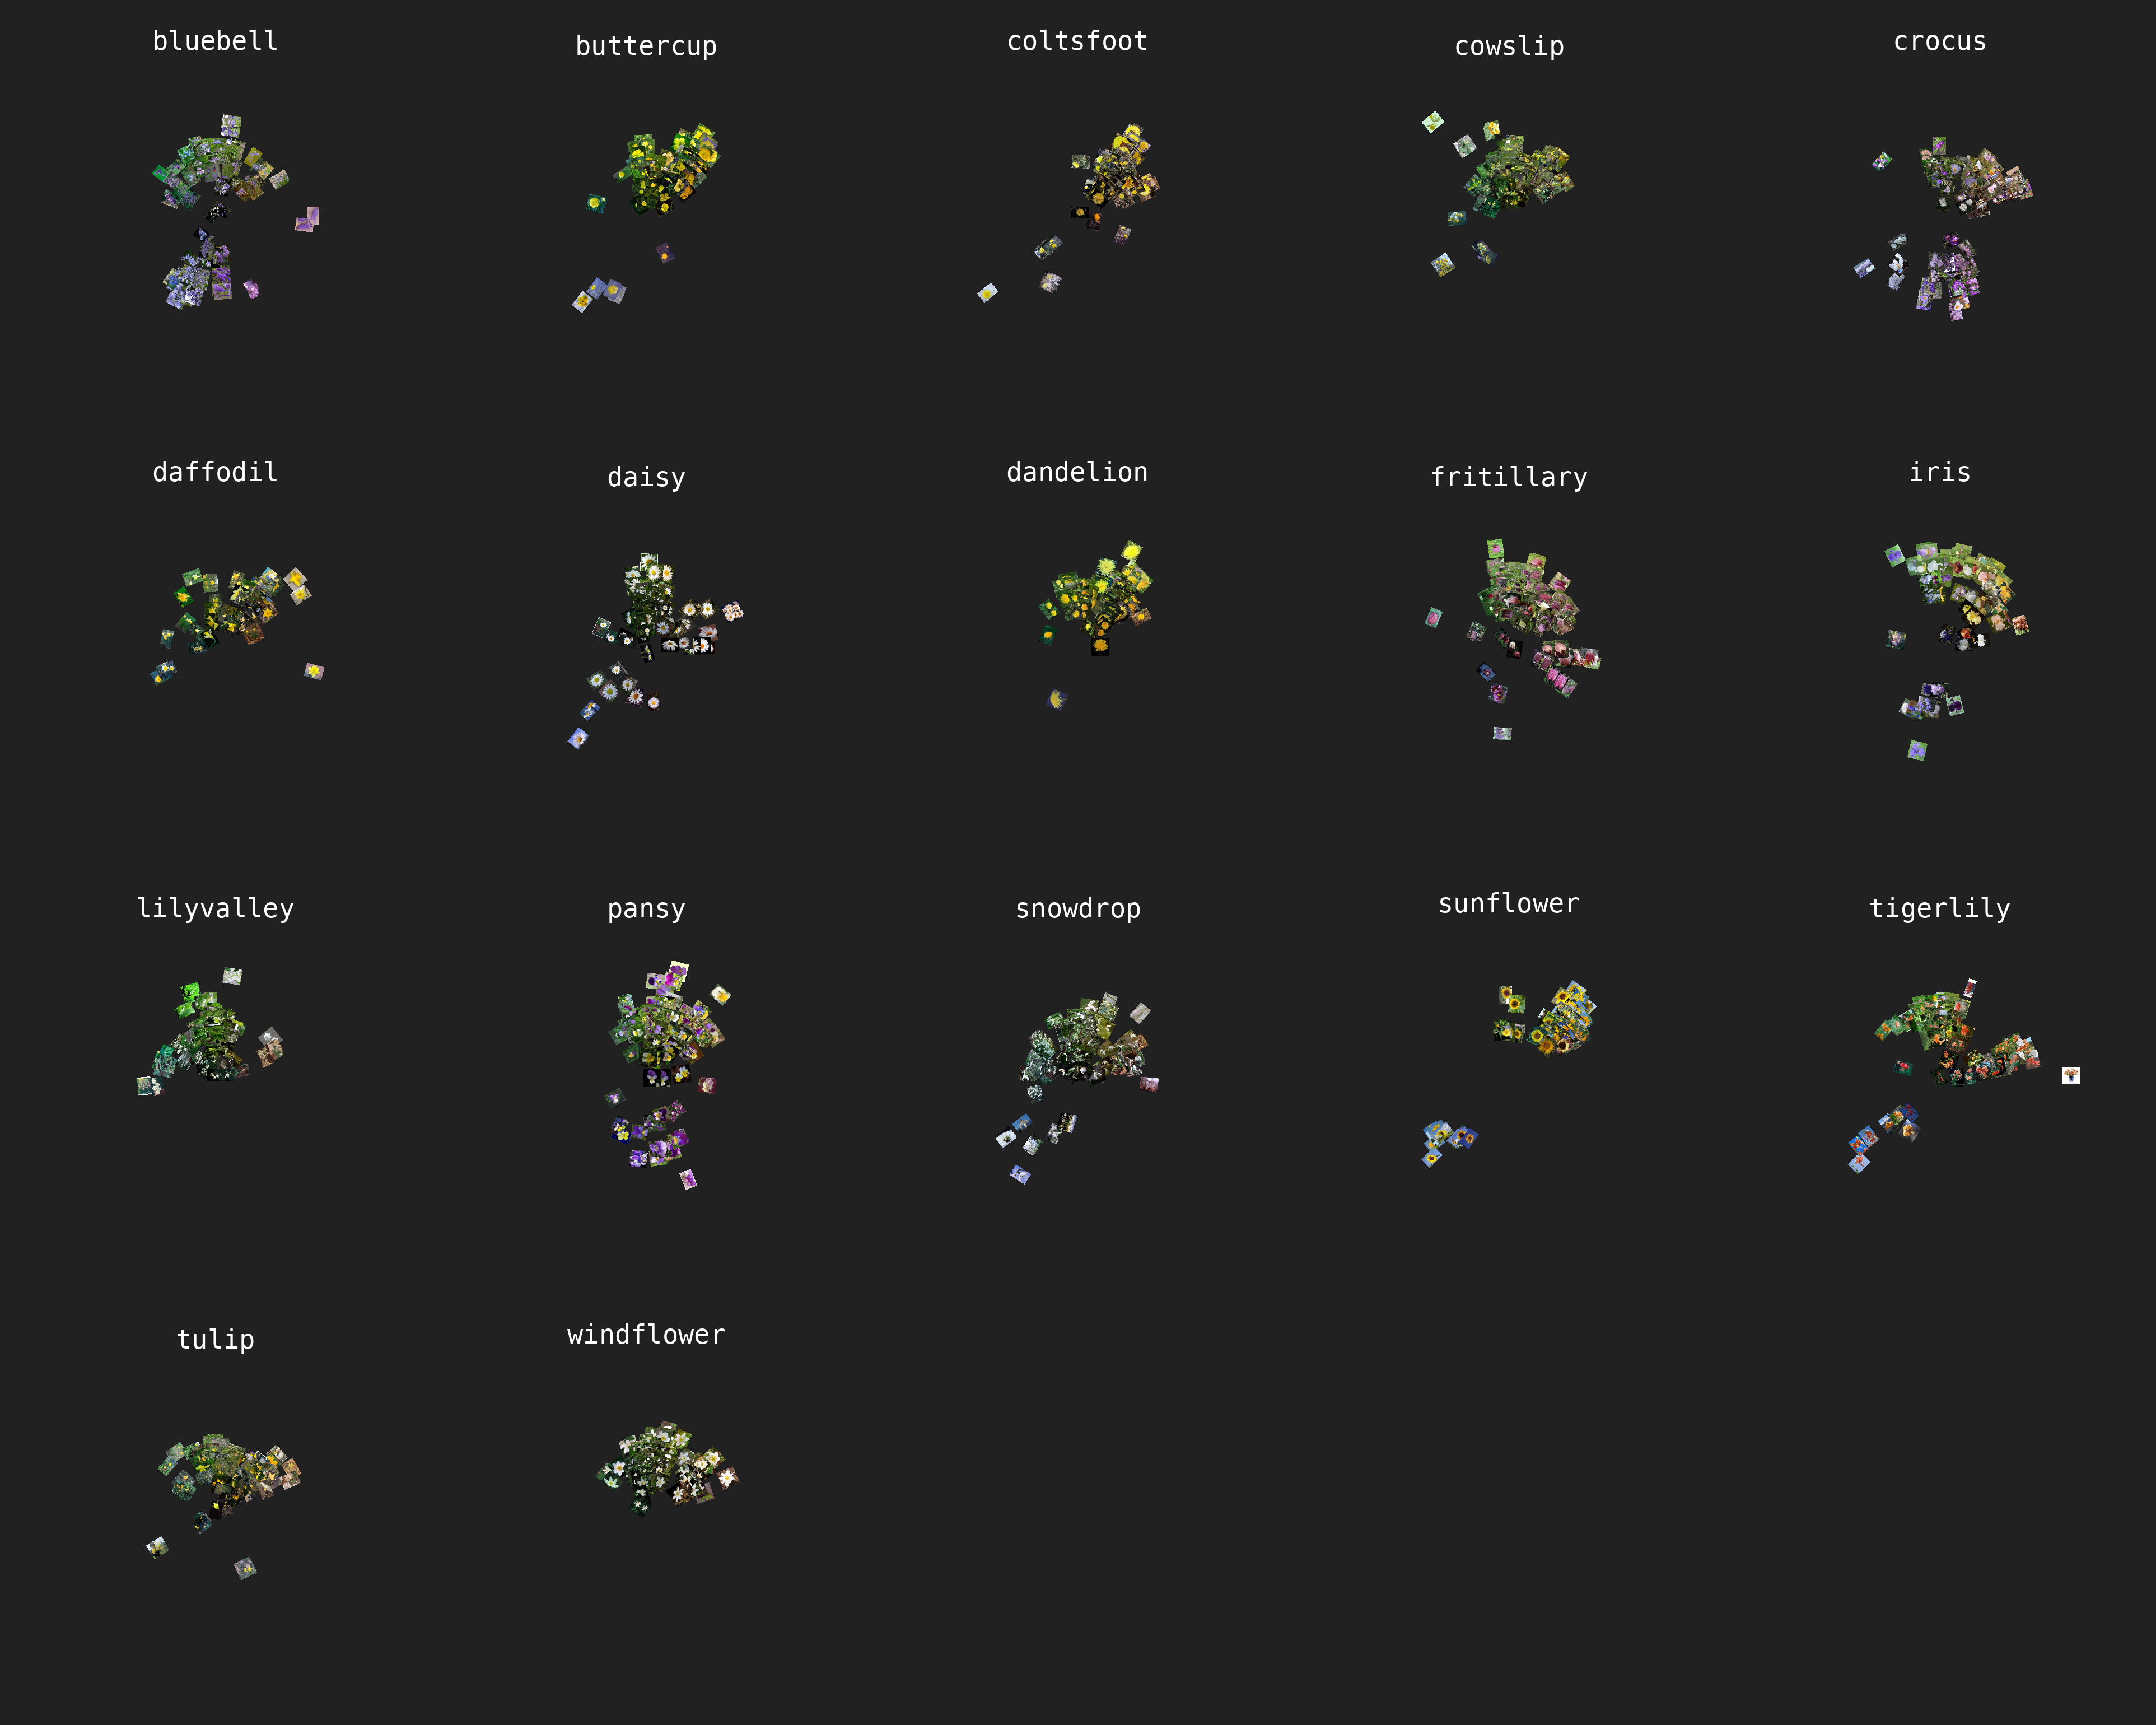

In [11]:
scatter('brightness','hue',facetcol='flowername',coordinates='polar')